In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [5]:
df.shape

(26707, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [7]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [8]:
df = df.fillna(df.mean())
df = round(df)

# For string fill missing value with 'No Category'

df = df.fillna('No Category')

In [9]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [11]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   unique_id                  26707 non-null  int64   
 1   h1n1_worry                 26707 non-null  float64 
 2   h1n1_awareness             26707 non-null  float64 
 3   antiviral_medication       26707 non-null  float64 
 4   contact_avoidance          26707 non-null  float64 
 5   bought_face_mask           26707 non-null  float64 
 6   wash_hands_frequently      26707 non-null  float64 
 7   avoid_large_gatherings     26707 non-null  float64 
 8   reduced_outside_home_cont  26707 non-null  float64 
 9   avoid_touch_face           26707 non-null  float64 
 10  dr_recc_h1n1_vacc          26707 non-null  float64 
 11  dr_recc_seasonal_vacc      26707 non-null  float64 
 12  chronic_medic_condition    26707 non-null  float64 
 13  cont_child_undr_6_mnths    2670

In [12]:
print(df.age_bracket.value_counts())
print(df.qualification.value_counts())
print(df.race.value_counts())
print(df.sex.value_counts())
print(df.income_level.value_counts())
print(df.marital_status.value_counts())
print(df.housing_status.value_counts())
print(df.employment.value_counts())
print(df.census_msa.value_counts())



65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
No Category          1407
Name: qualification, dtype: int64
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64
Female    15858
Male      10849
Name: sex, dtype: int64
<= $75,000, Above Poverty    12777
> $75,000                     6810
No Category                   4423
Below Poverty                 2697
Name: income_level, dtype: int64
Married        13555
Not Married    11744
No Category     1408
Name: marital_status, dtype: int64
Own            18736
Rent            5929
No Category     2042
Name: housing_status, dtype: int64
Employed              13560
Not in Labor Force    10231
No Category            1463
Unemployed             1453
Name: employment, dtype:

In [13]:
replaceStruct = {
                "age_bracket":     {"18 - 34 Years": 1, "35 - 44 Years": 2 ,"45 - 54 Years": 3 ,"55 - 64 Years":4,"65+ Years":5},
                "qualification": {"< 12 Years": 1, "12 Years":2 , "Some College": 3, "College Graduate": 4,"No Category": 5},
                 "race": {"Black": 1, "White":2 , "Hispanic": 3, "Other or Multiple": 4},
                 "sex":     {"Female": 1, "Male": 2 },
                "income_level":     {"Below Poverty": 1, "No Category": 2, "> $75,000":3, "<= $75,000, Above Poverty":4},
                "housing_status":     {"No Category": 1, "Rent": 2, "Own": 3 },
                "marital_status":     {"No Category": 1, "Not Married": 2, "Married": 3 },
                "employment":     {"No Category": 1, "Unemployed": 2, "Not in Labor Force": 3,"Employed":4 },
                "census_msa":     {"Non-MSA": 1, "MSA, Principle City": 2, "MSA, Not Principle  City": 3 },
                    }
oneHotCols=["age_bracket","qualification","race","sex","income_level","housing_status","marital_status","employment","census_msa"]

In [14]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)



,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,marital_status_3,marital_status_1,marital_status_2,employment_4,employment_1,employment_3,employment_2,census_msa_3,census_msa_2,census_msa_1
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,1,0,0,0,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,1,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,0,1,0,0,0,1,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,1,0,0,0,0,1,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,1,0,0,0,1,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,1,0,1,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

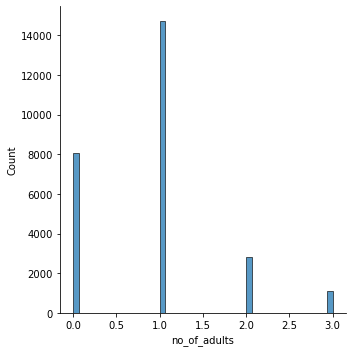

In [16]:
sns.displot(df.no_of_adults)


In [17]:
## No of adults is mostly 1 and some 0

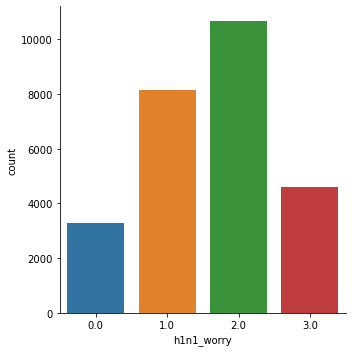

In [18]:
sns.factorplot('h1n1_worry', data = df, kind = "count")


In [19]:
## Most of the people are worried about h1n1

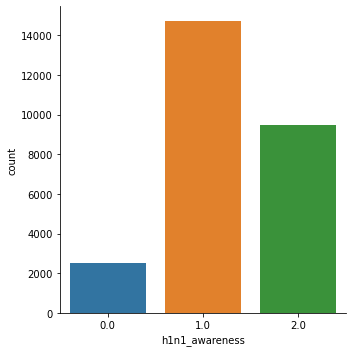

In [20]:
sns.factorplot('h1n1_awareness', data = df, kind = "count")


In [21]:
## most of the people are aware about h1n1

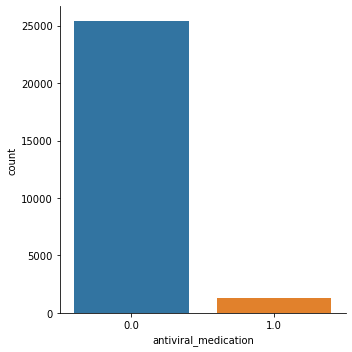

In [22]:
sns.factorplot('antiviral_medication', data = df, kind = "count")


In [23]:
## Almost non of the people took antiviral medications


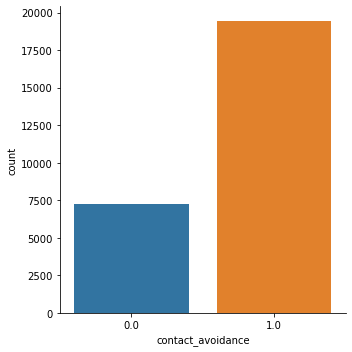

In [24]:
sns.factorplot('contact_avoidance', data = df, kind = "count")


In [25]:
## Almost 70% of people have avoided contact with people with symptoms


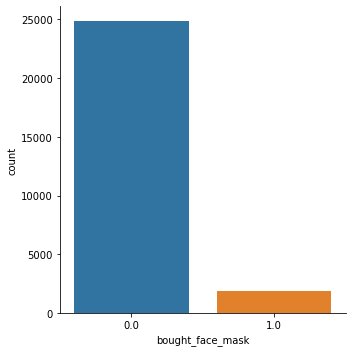

In [26]:
sns.factorplot('bought_face_mask', data = df, kind = "count")


In [27]:
## Very few people have bought a face mask

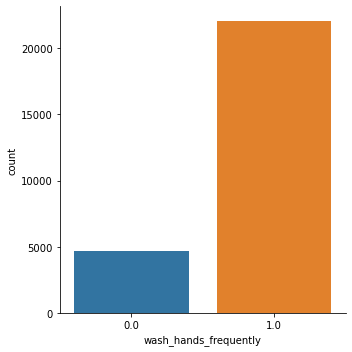

In [28]:
sns.factorplot('wash_hands_frequently', data = df, kind = "count")


In [29]:
## Almost 80% of people have frequently washed their hands


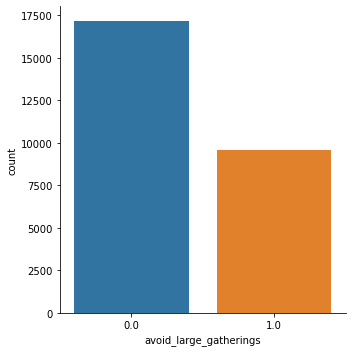

In [30]:
sns.factorplot('avoid_large_gatherings', data = df, kind = "count")


In [31]:
##Very Few people have reduced time at large gatherings

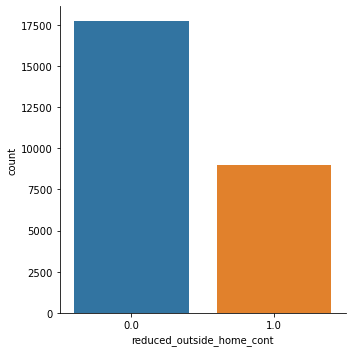

In [32]:
sns.factorplot('reduced_outside_home_cont', data = df, kind = "count")


In [33]:
##Very few people have reduced contact with people outside their household


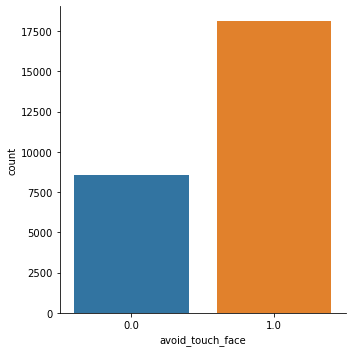

In [34]:
sns.factorplot('avoid_touch_face', data = df, kind = "count")


In [35]:
## Almost 70% of people have avoided touching face

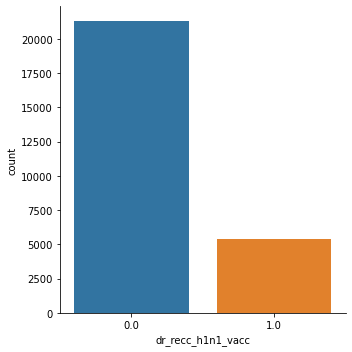

In [36]:
sns.factorplot('dr_recc_h1n1_vacc', data = df, kind = "count")


In [37]:
## Doctors recommended the h1n1 vaccine to almost 20% of people.


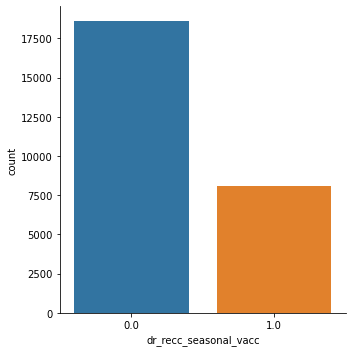

In [38]:
sns.factorplot('dr_recc_seasonal_vacc', data = df, kind = "count")


In [39]:
## Doctors recommended seasonal vaccine to only 30% of people

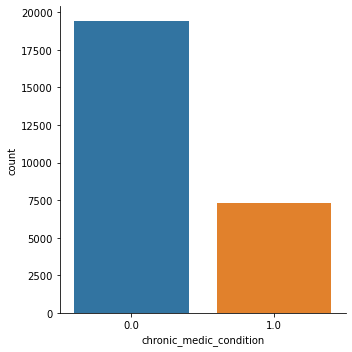

In [40]:
sns.factorplot('chronic_medic_condition', data = df, kind = "count")


In [41]:
X = df.drop("h1n1_vaccine" , axis=1)
y = df.pop("h1n1_vaccine")

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)


### Decision Tree Model


In [43]:
from sklearn.tree import DecisionTreeClassifier


In [44]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=0)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [45]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.7535255210283289


## Regularization

In [46]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8221889376270461
0.8299014102084113


In [47]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                Imp
unique_id                  0.000000
h1n1_worry                 0.000000
h1n1_awareness             0.000000
antiviral_medication       0.000000
contact_avoidance          0.000000
bought_face_mask           0.000000
wash_hands_frequently      0.000000
avoid_large_gatherings     0.000000
reduced_outside_home_cont  0.000000
avoid_touch_face           0.000000
dr_recc_h1n1_vacc          0.652655
dr_recc_seasonal_vacc      0.000000
chronic_medic_condition    0.000000
cont_child_undr_6_mnths    0.000000
is_health_worker           0.000000
has_health_insur           0.000000
is_h1n1_vacc_effective     0.175883
is_h1n1_risky              0.171462
sick_from_h1n1_vacc        0.000000
is_seas_vacc_effective     0.000000
is_seas_risky              0.000000
sick_from_seas_vacc        0.000000
no_of_adults               0.000000
no_of_children             0.000000
age_bracket_1              0.000000
age_bracket_2              0.000000
age_bracket_3              0

In [48]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

0.8299014102084113


<AxesSubplot:>

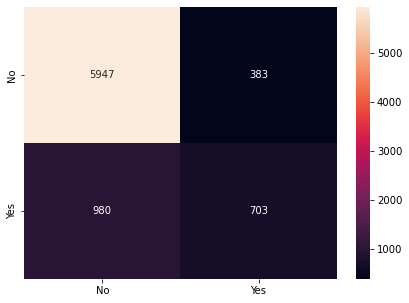

In [49]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble Learning - Bagging


In [50]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=50,base_estimator=dTree,random_state=0)
bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))

0.8386372145263946


<AxesSubplot:>

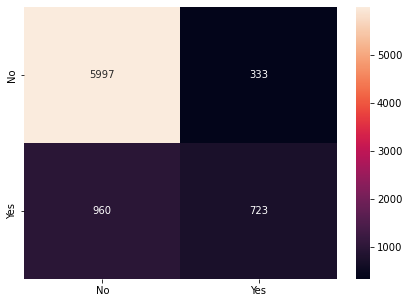

In [51]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble Learning - AdaBoosting


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=100, random_state=1)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

## Ensemble Learning - GradientBoost


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))


In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble RandomForest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [ ]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')